In [ ]:
pip install ucimlrepo

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics
from ucimlrepo import fetch_ucirepo

In [ ]:
from sklearn.ensemble import IsolationForest

function to remove outliers using isolation forest method

In [ ]:
def remove_outliers(df,dfx, contamination=0.05, n_estimators=250):
    iso_forest = IsolationForest(n_estimators=n_estimators, contamination=contamination, random_state=42)
    outlier_pred = iso_forest.fit_predict(df)
    inliers_mask = outlier_pred == 1
    return dfx[inliers_mask]

removing the outliers of the dataset using isolation forest method

In [ ]:
superconductivty_data = fetch_ucirepo(id=464)
super_dataseti = pd.DataFrame(data=superconductivty_data.data.features)
super_dataseti.head()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,mean_Valence,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,2.25,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,2.00,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,2.25,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,2.25,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,2.25,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809


In [ ]:
super_dataseti['critical_temp'] = superconductivty_data.data.targets
super_dataseti.head()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.0
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.0
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.0
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,22.0
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809,23.0


In [ ]:
df_cleaned = remove_outliers(super_dataseti.drop(columns=["critical_temp"]),super_dataseti)
df_cleaned.shape

(20200, 82)

describing the cleaned dataset

In [ ]:
df_cleaned.describe()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
count,20200.000000,20200.000000,20200.000000,20200.000000,20200.000000,20200.000000,20200.000000,20200.000000,20200.000000,20200.000000,...,20200.000000,20200.000000,20200.000000,20200.000000,20200.000000,20200.000000,20200.000000,20200.000000,20200.000000,20200.000000
mean,4.227525,86.422927,71.029667,69.867414,56.168368,1.202348,1.103435,118.668319,31.826151,45.291768,...,3.084820,3.003954,2.986237,1.334768,1.092192,2.076040,1.441157,0.848788,0.686145,35.925452
std,1.375640,26.803349,29.333984,27.517477,32.317302,0.326533,0.365518,52.436448,22.572264,18.985151,...,1.137336,0.985256,1.115688,0.352498,0.340102,1.219696,0.879669,0.469187,0.448242,34.409922
min,2.000000,8.876000,8.677400,8.662514,6.825006,0.053144,0.007609,1.054600,0.023220,0.527300,...,1.100000,1.414214,1.071773,0.450561,0.005053,0.000000,0.000000,0.000000,0.000000,0.001000
25%,3.000000,72.816957,52.190638,58.600289,35.259077,1.026956,0.856775,81.482000,17.295295,34.324267,...,2.114274,2.245649,2.086780,1.077556,0.858741,1.000000,0.926629,0.471405,0.318884,6.060000
50%,4.000000,84.282444,60.220216,66.347572,39.076333,1.228954,1.169033,122.906070,26.607652,45.684282,...,2.554931,2.605171,2.374286,1.368922,1.197340,2.000000,1.061538,0.800000,0.500000,22.300000
75%,5.000000,99.020971,83.095642,76.778108,70.150786,1.444612,1.372050,156.448000,37.870061,59.663892,...,3.966667,3.634241,3.736915,1.594167,1.342332,3.000000,1.829561,1.200000,1.022357,66.000000
max,9.000000,208.090200,208.386933,208.088296,208.385240,1.983797,1.958203,207.972460,205.589910,101.019700,...,6.830000,6.480741,6.818943,2.141963,1.949739,6.000000,5.931069,2.624669,2.266912,143.000000


representing correlation of features using the given dataset using heatmap

<Axes: >

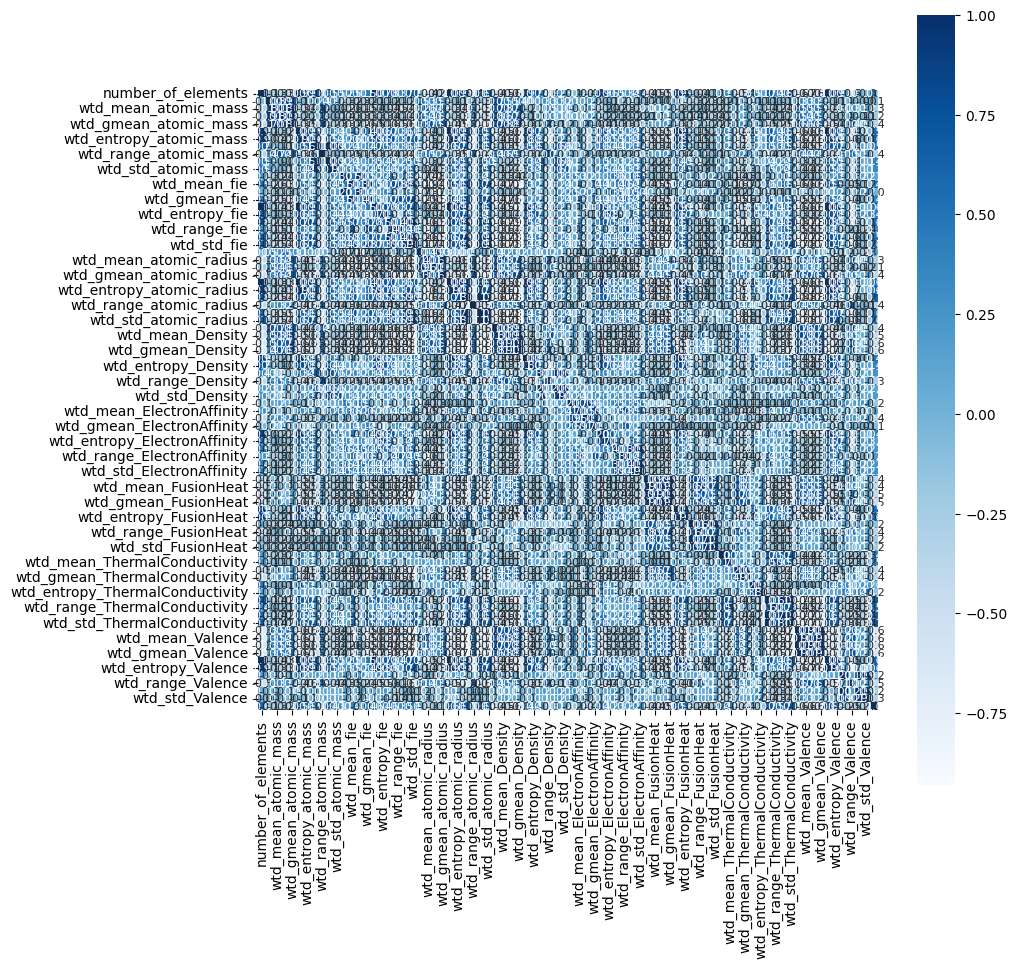

In [ ]:
correlation = df_cleaned.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

printing cleaned dataset

In [ ]:
X = df_cleaned.drop(columns='critical_temp', axis=1)
Y = df_cleaned['critical_temp']
print(X)
print(Y)

       number_of_elements  mean_atomic_mass  wtd_mean_atomic_mass  \
0                       4         88.944468             57.862692   
1                       5         92.729214             58.518416   
2                       4         88.944468             57.885242   
3                       4         88.944468             57.873967   
4                       4         88.944468             57.840143   
...                   ...               ...                   ...   
21258                   4        106.957877             53.095769   
21259                   5         92.266740             49.021367   
21260                   2         99.663190             95.609104   
21261                   2         99.663190             97.095602   
21262                   3         87.468333             86.858500   

       gmean_atomic_mass  wtd_gmean_atomic_mass  entropy_atomic_mass  \
0              66.361592              36.116612             1.181795   
1              73.132787   

split data sets into training sets and validation set

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
print(X.shape, X_train.shape, X_test.shape)

(20200, 81) (13534, 81) (6666, 81)


making the model on training data using XGBoost regressor

In [ ]:
model = XGBRegressor(
      n_estimators=300,
    max_depth=8,
    learning_rate=0.02,
    colsample_bytree=0.5,
    objective='reg:squarederror',
    random_state=42,
)
model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.5, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.02, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=8, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=300, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

r2 score acheived by model on trained data

In [ ]:
training_data_prediction1 = model.predict(X_train)
r2_train1 = metrics.r2_score(Y_train, training_data_prediction1)
print('R Squared value = ', r2_train1)

R Squared value =  0.9644866215823131


plot of predicted values of trained by model vs actual values of model

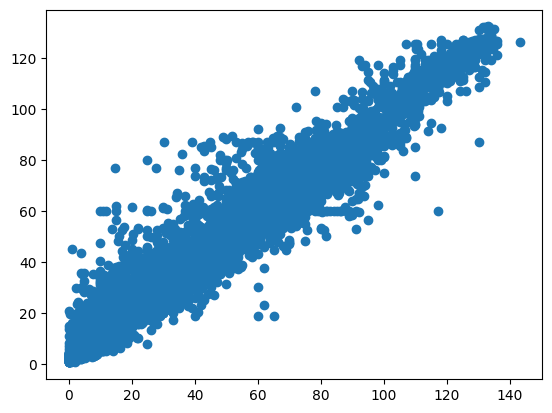

In [ ]:
plt.scatter(Y_train, training_data_prediction1)

test data prediction and accuracy acheived

In [ ]:
test_data_prediction1 = model.predict(X_test)
r2_test1 = metrics.r2_score(Y_test, test_data_prediction1)
print('R Squared value = ', r2_test1)

R Squared value =  0.9184904981911981
